This notebook produces the figures to demonstrate our four SNe distribution models.

Model 1: SNe are randomly placed within the galaxy map (PHANGS--ALMA footprint).  
Model 2: SNe follow the gas distribution within the galaxy (PHANGS--ALMA).  
Model 3: SNe follow the stellar profile of the galaxy (IRAC/WISE infrared 3.6 microns).  
Model 4: SNe are split between Models 2 & 3 with ~76% CCSNe following the gas distribution and the reminaing following the stellar profile.  

In [1]:
#import packages and initialize settings
#!pip install aplpy
import aplpy
import pandas as pd
import os
import numpy as np
from astropy.io import fits
import astropy.io.fits as pyfits
from astropy.wcs import WCS
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table
from astropy.io import ascii
from reproject import reproject_interp

import sys
sys.path.append('/home/maykerchen.1/Desktop/PythonFunctions')
from deprojectGalaxy import deproject
from FindNearestMC import int2mass, mass2int, findNearest, angDistToPc
from SNeGenerationModels import runModels
from normalize import norm, normMap

database = Table.read('../Data/3.SNe+GalData.csv', format = "csv")
centerCoords = [(database["orient_ra"][i], database["orient_dec"][i]) for i in range(len(database))]   
database[0:1]


galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,PACovFile,IFRFile,MixedMaps,IFRResizedMaps,MassMaps
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str80,str112,str97,str37,str54,str35
circinus,SN1996cr,II,213.2918,-65.3457,86.56761411031889,84.63433198287285,186.84804,2.137819,34.56537,0.002032163908078,213.29124,-65.33915,4.2,36.74,64.3,262.49515,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/ESO097-013_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/eso097-013_w1_gauss7p5.fits,../Data/MixedMaps/circinus_Mixed.fits,../Data/ReprojectedInfraredMaps/circinus_reshaped.fits,../Data/MassMaps/circinus_Mass.fits


In [2]:
def unique(origGalsList, origDistList, imageFileList, centerCoords, posAngList, inclList, covFileList, ifrFileList, AlphaCOFileList): 
    gals, dists, images, coords, posAngs, inclinations, covFiles, ifrFiles, acoFiles = [],[],[],[],[],[],[],[],[]
    for i in range(len(origGalsList)): 
        if origGalsList[i] not in gals: 
            if origGalsList[i] != "ngc1068" and origGalsList[i] != "ngc1672" and origGalsList[i] != "ngc4579":
                gals.append(origGalsList[i]) 
                dists.append(origDistList[i])
                images.append(imageFileList[i])
                coords.append(centerCoords[i])
                posAngs.append(posAngList[i])
                inclinations.append(inclList[i]) 
                covFiles.append(covFileList[i])
                ifrFiles.append(ifrFileList[i])
                acoFiles.append(AlphaCOFileList[i])
            else:
                pass
    return(gals, dists, images, coords, posAngs, inclinations, covFiles, ifrFiles, acoFiles)

gals, dists, images, coords, posAngs, inclinations, covFiles, ifrFiles, acoFiles = unique(database["galaxy"], database["dist"],database["ImageFile150"], centerCoords, database["orient_posang"], database["orient_incl"], database["PACovFile"], database["IFRFile"], database["AlphaCOFile"])

#print(gals, dists, images, coords, posAngs, inclinations, covFiles, ifrFiles, acoFiles)
print(gals)


['circinus', 'ngc0253', 'ngc0628', 'ngc1087', 'ngc1097', 'ngc1365', 'ngc1433', 'ngc1511', 'ngc1559', 'ngc1566', 'ngc1637', 'ngc2775', 'ngc2997', 'ngc3239', 'ngc3627', 'ngc4254', 'ngc4303', 'ngc4321', 'ngc4424', 'ngc4457', 'ngc4496a', 'ngc4536', 'ngc4945', 'ngc5128', 'ngc5236', 'ngc5530', 'ngc6744', 'ngc7793']


ngc4303
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


r_sm: [ 6.31723875e+01  1.39268567e+02  3.47615424e+01  1.24304338e+01
  9.38034854e+00  1.60093009e+01  1.33042077e+01 -1.01824965e+00
  1.65321838e+02  5.85842299e+01  5.07708902e+01  7.79469064e+00
  2.37166847e+01  9.69007204e+00  7.98760687e+00  1.88932251e+01
 -1.26683756e+01  3.33947730e+01  3.03870370e+01 -1.09802458e+00
  1.29280305e+01  5.00469171e+00  5.48532064e+01  1.29842452e+01
  1.04387239e+01 -2.86585905e+00  6.64337062e+01  6.28844846e+01
  4.68254718e+00  6.05500064e+01  3.39947147e+01  1.05175444e+01
 -2.20035418e+00 -5.34944647e+00 -3.59340611e+01  9.10883297e+00
  2.70856206e+01 -1.02591235e+00  7.10704155e+00  0.00000000e+00
  1.81986162e+01  1.21620026e+01  1.06139476e+01  7.05643764e+01
  7.63488589e+00  3.79342712e+00  2.64653518e+01  1.35847640e+01
  2.51964991e+02  7.15042650e+00 -4.45981507e+01  2.04025191e+01
  1.39761720e+01  2.31794356e+01  3.72236793e+01  4.55774470e+01
  1.47156952e+01  1.89181030e+00  6.71879196e+00 -1.99450299e-02
  2.30557938e+01  2

INFO: Auto-setting vmax to  2.205e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.161e+01 [aplpy.core]


/home/maykerchen.1/.local/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)
/home/maykerchen.1/.local/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


INFO: Auto-setting vmax to  2.483e+00 [aplpy.core]
INFO: Auto-setting vmax to  5.841e-01 [aplpy.core]


/home/maykerchen.1/.local/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)
/home/maykerchen.1/.local/lib/python3.8/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


done with  ngc4303


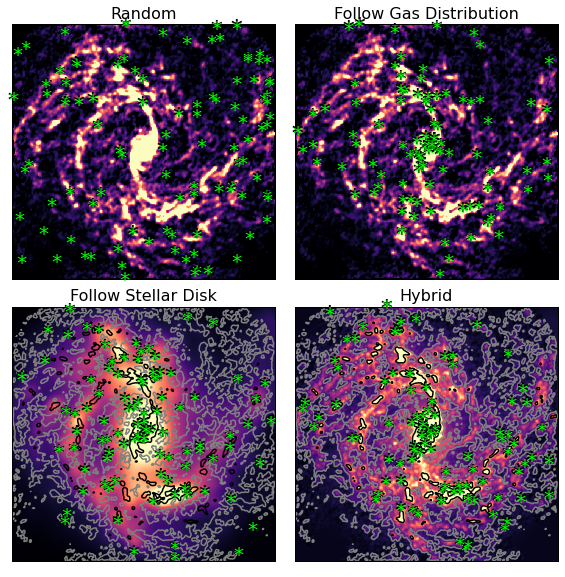

In [3]:
area = (150.0/2.0)**2*np.pi/np.log(2.0)

# for i in range(len(gals)): 
#     print("starting ", gals[i])
for i in range(1):
    i = 16
    print(gals[i])
    coFile  = images[i]
    covFile = covFiles[i]
    ifrFile = ifrFiles[i]
    acoFile = acoFiles[i]

    hdu_co  = fits.open(coFile)
    hdu_cov = pyfits.open(covFile)
    hdu_ifr = pyfits.open(ifrFile)
    
    co_map  = hdu_co[0].data 
    covMap  = hdu_cov[0].data
    ifrMap, footprint = reproject_interp(hdu_ifr, hdu_cov[0].header)
    
    if(os.path.isfile(acoFile)):
        hdu_aco = pyfits.open(acoFile)
        acoMap, footprint = reproject_interp(hdu_aco, hdu_cov[0].header) 
        massMap = co_map * acoMap * area
    else: massMap = co_map * 6.7 * area
    
    massFile = "../Data/MassMaps/" + gals[i] + "_Mass.fits"
#     mass_hdu = fits.PrimaryHDU(massMap, hdu_cov[0].header)
#     mass_hdu.writeto(massFile, overwrite = True)
    outco  = "../Data/ReprojectedInfraredMaps/" + gals[i] + '_reshaped.fits'
#     new_hdu = fits.PrimaryHDU(ifrMap, hdu_cov[0].header)
#     new_hdu.writeto(outco, overwrite=True)

    ifr_hdu = pyfits.open(outco)
    ifr_map = ifr_hdu[0].data

    wcs     = WCS(hdu_cov[0].header, naxis=2)
    naxis   = wcs._naxis # size of image naxis[0] = x and [1] = y
    grid    = np.indices((naxis[1],naxis[0]))
    ra, dec = wcs.wcs_pix2world(grid[1],grid[0],0) 

    f_cov = covMap.flatten()
    f_ifr = ifr_map.flatten() 
    f_ra  = ra.flatten()
    f_dec = dec.flatten()

    keep = np.where((f_cov > 0.9) & np.isfinite(f_ifr))
    ifr  = f_ifr[keep]
    star_ra   = f_ra[keep]
    star_dec  = f_dec[keep]
    
    co_map = np.nan_to_num(co_map)
    ifr_map = np.nan_to_num(ifr_map)

    normCO = normMap(co_map)
    normIFR = normMap(ifr_map)
    ratioCO = 0.76 * normCO
    ratioIFR = 0.24 * normIFR
    mixedMap = ratioCO + ratioIFR
    
    outco = "../Data/MixedMaps/" + gals[i] + '_Mixed.fits' 
#     new_hdu = fits.PrimaryHDU(mixedMap, ifr_hdu[0].header)
#     new_hdu.writeto(outco, overwrite=True)
    mixhdu = pyfits.open(outco)
    mixMap = mixhdu[0].data

    raArr1, decArr1, dxArr1, dyArr1, sm1 = runModels(gals[i], images[i], co_map, coords[i], posAngs[i], inclinations[i], dists[i], modelType=1)
    raArr2, decArr2, dxArr2, dyArr2, sm2 = runModels(gals[i], images[i], co_map, coords[i], posAngs[i], inclinations[i], dists[i], modelType=2)
    raArr3, decArr3, dxArr3, dyArr3, sm3 = runModels(gals[i], images[i], co_map, coords[i], posAngs[i], inclinations[i], dists[i], modelType=3, starLight = ifr, starRa = star_ra, starDec = star_dec)
    raArr4a, decArr4a, dxArr4a, dyArr4a, sm4a = runModels(gals[i], images[i], co_map, coords[i], posAngs[i], inclinations[i], dists[i], modelType=2, expSize = 76)
    raArr4b, decArr4b, dxArr4b, dyArr4b, sm4b = runModels(gals[i], images[i], co_map, coords[i], posAngs[i], inclinations[i], dists[i], modelType=3, starLight = ifr, starRa = star_ra, starDec = star_dec, expSize = 24)

    raArr4 = np.concatenate((raArr4a, raArr4b))
    decArr4 = np.concatenate((decArr4a, decArr4b)) 
    dxArr4 = np.concatenate((dxArr4a, dxArr4b)) 
    dyArr4 = np.concatenate((dyArr4a, dyArr4b)) 

    fig = plt.figure(figsize=(8, 8), facecolor = 'white')

    f1 = aplpy.FITSFigure(co_map, figure=fig, subplot=(2,2,1))
    f1.tick_labels.hide()
    f1.ticks.hide()
    f1.axis_labels.hide()
    f1.set_title("Random", fontsize = 16)

    f2 = aplpy.FITSFigure(co_map, figure=fig,  subplot=(2,2,2))
    f2.tick_labels.hide()
    f2.ticks.hide()
    f2.axis_labels.hide()
    f2.set_title("Follow Gas Distribution", fontsize=16)


    f3 = aplpy.FITSFigure(ifr_map, stretch="log", figure=fig,  subplot=(2,2,3))
    f3.tick_labels.hide()
    f3.ticks.hide()
    f3.axis_labels.hide()
    f3.show_contour(massMap, ifr_hdu, levels = [10**5.5, 10**6.5], colors = ["grey", "black"])
    f3.set_title("Follow Stellar Disk", fontsize=16)

    
    f4 = aplpy.FITSFigure(mixMap, mixhdu, figure=fig,  subplot=(2,2,4))
    f4.tick_labels.hide()
    f4.ticks.hide()
    f4.axis_labels.hide()
    f4.show_contour(massMap, ifr_hdu, levels = [10**5.5, 10**6.5], colors = ["grey", "black"])
    f4.set_title("Hybrid", fontsize=16)

    
    f1.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
    f1.set_nan_color('black')

    f2.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
    f2.set_nan_color('black')

    f3.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
    f3.set_nan_color('black')

    f4.show_colorscale(vmin=0, pmax=95, cmap='magma', stretch='linear')
    f4.set_nan_color('black')
    
    fig.tight_layout()

    xArr1, yArr1 = wcs.wcs_world2pix(raArr1,decArr1,0)
    xArr2, yArr2 = wcs.wcs_world2pix(raArr2,decArr2,0)
    xArr3, yArr3 = wcs.wcs_world2pix(raArr3,decArr3,0)
    xArr4, yArr4 = wcs.wcs_world2pix(raArr4,decArr4,0)

    for k in range(len(dxArr3)):
        f1.add_label(float(xArr1[k]), float(yArr1[k]), text='*', color='black', fontsize = 22, weight="bold")
        f2.add_label(float(xArr2[k]), float(yArr2[k]), text='*', color="black", fontsize = 22, weight="bold")
        f3.add_label(float(xArr3[k]), float(yArr3[k]), text='*', color="black", fontsize = 22, weight="bold")
        f4.add_label(float(xArr4[k]), float(yArr4[k]), text='*', color="black", fontsize = 22, weight="bold")
        f1.add_label(float(xArr1[k]), float(yArr1[k]), text='*', color='lime', fontsize = 20)
        f2.add_label(float(xArr2[k]), float(yArr2[k]), text='*', color="lime", fontsize = 20)
        f3.add_label(float(xArr3[k]), float(yArr3[k]), text='*', color="lime", fontsize = 20)
        f4.add_label(float(xArr4[k]), float(yArr4[k]), text='*', color="lime", fontsize = 20)

    figName = "../Figures/" + gals[i] + "Models.png"
    fig.savefig(figName, dpi = 300)
    print("done with ",gals[i])


In [4]:
massFileList, mixedMapsList, ifrResizeList = [],[],[]

for i in range(len(database["galaxy"])):
    mixedMapsList.append("../Data/MixedMaps/" + database["galaxy"][i] + '_Mixed.fits')
    ifrResizeList.append("../Data/ReprojectedInfraredMaps/" + database["galaxy"][i] + '_reshaped.fits')
    massFileList.append("../Data/MassMaps/" + database["galaxy"][i] + '_Mass.fits') 


database.add_column(mixedMapsList, name = "MixedMaps")
database.add_column(ifrResizeList, name = "IFRResizedMaps")
database.add_column(massFileList, name = "MassMaps")

database.write('../Data/3.SNe+GalData.csv', format = "csv", overwrite = True)

ValueError: Cannot replace column 'MixedMaps'.  Use Table.replace_column() instead.